In [90]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import *
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR

from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
from bayes_opt import BayesianOptimization
from functools import partial   

In [14]:
lo = LeaveOneOut()
kf = KFold(n_splits = 15)

In [4]:
train = pd.read_csv("iris_train.csv")
test = pd.read_csv("iris_test.csv")

In [5]:
train.head()

,id,species,sepal length (cm),petal length (cm),sepal width (cm),petal width (cm)
0,0,setosa,4.4,1.4,2.9,0.2
1,1,versicolor,6.4,4.5,3.2,1.5
2,2,virginica,6.2,4.8,2.8,1.8
3,3,virginica,7.2,6.1,3.6,2.5
4,4,setosa,4.9,1.4,3.0,0.2


In [6]:
test.head()

,id,species,sepal length (cm),petal length (cm)
0,0,setosa,5.4,1.7
1,1,setosa,5.7,1.5
2,2,setosa,5.3,1.5
3,3,setosa,5.1,1.9
4,4,virginica,6.0,4.8


In [7]:
train = pd.get_dummies(columns = ['species'], data = train)
test = pd.get_dummies(columns = ['species'], data = test)

In [9]:
X = train.drop(['id', 'sepal width (cm)', 'petal width (cm)'], axis = 1)
y1 = train['sepal width (cm)']
y2 = train['petal width (cm)']

In [10]:
target = test[X.columns]

***
### Linear Regression

In [52]:
lr_pred1 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y1))) :
    tr_x, tr_y = X.iloc[idx[0][0]], y1.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y1.iloc[idx[0][1]]
    
    lr = LinearRegression(normalize = True)
    
    lr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = lr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = lr.predict(target) / 15
    lr_pred1 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.23209368457852253


In [53]:
lr_pred2 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y2))) :
    tr_x, tr_y = X.iloc[idx[0][0]], y2.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y2.iloc[idx[0][1]]
    
    lr = LinearRegression()
    
    lr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = lr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = lr.predict(target) / 15
    lr_pred2 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.1425669806932523


***
### SVR

In [54]:
svr_pred1 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y1))) :
    tr_x, tr_y = X.iloc[idx[0][0]], y1.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y1.iloc[idx[0][1]]
    
    svr = SVR(C = 5)
    
    svr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = svr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = svr.predict(target) / 15
    svr_pred1 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.2216389487498238


In [55]:
svr_pred2 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y2))) :
    tr_x, tr_y = X.iloc[idx[0][0]], y2.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y2.iloc[idx[0][1]]
    
    svr = SVR(C = 5)
    
    svr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = svr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = svr.predict(target) / 15
    svr_pred2 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.1309022081353984


***
### RandomForestRegressor

In [67]:
rf_pred1 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y1))) :
    tr_x, tr_y = X.iloc[idx[0][0]], y1.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y1.iloc[idx[0][1]]
    
    rf = RandomForestRegressor(random_state = 42, n_estimators = 175, criterion = 'mae', max_depth = 3)
    
    rf.fit(tr_x, tr_y)
    
    ### validation
    val_pred = rf.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = rf.predict(target) / 15
    rf_pred1 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.23360380952380935


In [62]:
rf_pred2 = np.zeros((target.shape[0]))
for i, idx in enumerate(zip(kf.split(X, y2))) :

    tr_x, tr_y = X.iloc[idx[0][0]], y2.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y2.iloc[idx[0][1]]
    
    rf = RandomForestRegressor(random_state = 42, n_estimators = 175, criterion = 'mae', max_depth = 3)
    
    rf.fit(tr_x, tr_y)

    val_pred = rf.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = rf.predict(target) / 15
    rf_pred2 += fold_pred


print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.15476194709143618


***
### DecisionTreeRegressor

In [76]:
dtr_pred1 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y1))) :

    tr_x, tr_y = X.iloc[idx[0][0]], y1.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y1.iloc[idx[0][1]]
    
    dtr = DecisionTreeRegressor(random_state = 42, max_depth = 3)
    
    dtr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = dtr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)

    
    ### prediction
    fold_pred = dtr.predict(target) / 15
    dtr_pred1 += fold_pred

print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.2441732865984806


In [77]:
dtr_pred2 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y2))) :

    tr_x, tr_y = X.iloc[idx[0][0]], y2.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y2.iloc[idx[0][1]]
    
    dtr = DecisionTreeRegressor(random_state = 42, max_depth = 3)
    
    dtr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = dtr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)
    
    ### prediction
    fold_pred = dtr.predict(target) / 15
    dtr_pred2 += fold_pred

print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.15127318519114186


***
### ExtraTreeRegressor

In [82]:
etr_pred1 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y1))) :

    tr_x, tr_y = X.iloc[idx[0][0]], y1.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y1.iloc[idx[0][1]]
    
    etr = ExtraTreesRegressor(random_state = 42, n_estimators = 175, max_depth = 3)
    
    etr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = etr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)

    
    ### prediction
    fold_pred = etr.predict(target) / 15
    etr_pred1 += fold_pred

print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.22322380051202093


In [83]:
etr_pred2 = np.zeros((target.shape[0]))
vm_list = []
for i, idx in enumerate(zip(kf.split(X, y2))) :

    tr_x, tr_y = X.iloc[idx[0][0]], y2.iloc[idx[0][0]]
    val_x, val_y = X.iloc[idx[0][1]], y2.iloc[idx[0][1]]
    
    etr = ExtraTreesRegressor(random_state = 42, n_estimators = 175, max_depth = 3)
    
    etr.fit(tr_x, tr_y)
    
    ### validation
    val_pred = etr.predict(val_x)
    val_mae = mean_absolute_error(val_y, val_pred)
    vm_list.append(val_mae)

    
    ### prediction
    fold_pred = etr.predict(target) / 15
    etr_pred2 += fold_pred

print(f'75 FOLD 평균 MAE = {np.mean(vm_list)}')

75 FOLD 평균 MAE = 0.15056746211179667


***
### Ensemble

In [23]:
submission = pd.read_csv("sample_submission.csv")

In [92]:
submission.iloc[:, 1] = (lr_pred1 + svr_pred1 + dtr_pred1 + rf_pred1) / 4
submission.iloc[:, 2] = (lr_pred2 + svr_pred2 + dtr_pred2 + rf_pred2) / 4

In [93]:
submission.to_csv('1027_3rd.csv', index = False)

***
### Comparison by Best Score

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
best = pd.read_csv("1027_1st.csv")

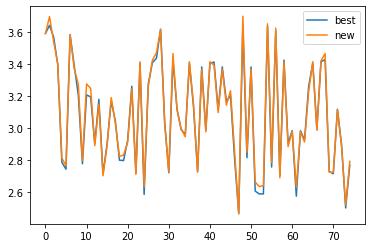

In [94]:
best['sepal width (cm)'].plot(label = 'best')
submission['sepal width (cm)'].plot(label = 'new')
plt.legend()
plt.show()

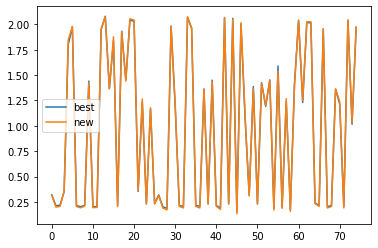

In [95]:
best['petal width (cm)'].plot(label = 'best')
submission['petal width (cm)'].plot(label = 'new')
plt.legend()
plt.show()